<a href="https://colab.research.google.com/github/hmh10098/Introduction-to-TensorFlow-for-Artificial-Intelligence-Machine-Learning-and-Deep-Learning/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
fashion_mnist = keras.datasets.mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

In [ ]:
train_images = train_images.reshape(60000, 28 , 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [ ]:
from tensorflow.python.ops.gen_nn_ops import MaxPool

model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
model = keras.Sequential([keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                         keras.layers.MaxPooling2D((2, 2)),   
                         keras.layers.Flatten(),
                         keras.layers.Dense(128, activation='relu'), 
                         keras.layers.Dense(10, activation='softmax')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, log={}):
    if log.get('accuracy')>0.998:
      print('\nReached 99% accuracy so cancelling training!')
      self.model.stop_training=True

In [ ]:
callback = myCallback()
import time
start = time.time()
model.fit(train_images, train_labels, epochs=20, callbacks=[callback])
print(time.time()-start)

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1534 - accuracy: 0.9543
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0519 - accuracy: 0.9843
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0335 - accuracy: 0.9896
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0223 - accuracy: 0.9930
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0142 - accuracy: 0.9955
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0114 - accuracy: 0.9963
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0076 - accuracy: 0.9974
Epoch 8/20
1872/1875 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9980
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0060 - accuracy: 0.9980
68.32874369621277


In [ ]:
test_lost, test_accuracy = model.evaluate(test_images, test_labels)
print(test_lost, test_accuracy)
149.42572259902954


313/313 [==============================] - 1s 4ms/step - loss: 0.0497 - accuracy: 0.9882
0.04969128966331482 0.9882000088691711


In [ ]:
print(test_labels[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


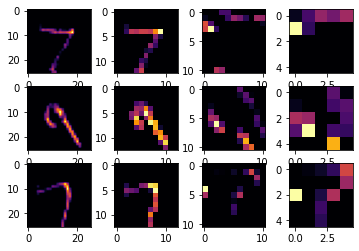

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [ ]:
len(layer_outputs)

7